In [20]:
import os
import csv
from collections import defaultdict, Counter
import json
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
LOGS = '/mnt/data0/lucy/gpt3_bias/logs/'
prompts_path = LOGS + 'original_prompts/'

## Character networks

In [51]:
d = {'main_gender':[], 'frac':[], 'neighbor_gender':[]}
for title in os.listdir(prompts_path): 
    if not os.path.exists(LOGS + 'char_neighbors_0.9/' + title + '.json'): continue
    with open(LOGS + 'char_neighbors_0.9/' + title + '.json', 'r') as infile: 
        char_neighbors = json.load(infile)
    for char in char_neighbors: 
        main_gender = None
        neighbor_dict = char_neighbors[char]
        s = char + ' --- '
        neighbor_names = set()
        for neighbor in neighbor_dict: 
            neighbor_n = neighbor['character_name']
            pns = defaultdict(int, neighbor['gender'])
            total = sum(list(pns.values()))
            if pns['masc'] > 0.75*total: 
                gender = 'masc'
            elif pns['fem'] > 0.75*total: 
                gender = 'fem'
            else: 
                gender = 'other'
            if neighbor_n == char: 
                # main character
                main_gender = gender
            else: 
                neighbor_names.add((neighbor_n, gender))
        neighbor_genders = Counter([tup[1] for tup in neighbor_names])
        total = sum(list(neighbor_genders.values()))
        d['main_gender'].append(main_gender)
        d['frac'].append(neighbor_genders['other']/total)
        d['neighbor_gender'].append('other')
        d['main_gender'].append(main_gender)
        d['frac'].append(neighbor_genders['fem']/total)
        d['neighbor_gender'].append('fem')
        d['main_gender'].append(main_gender)
        d['frac'].append(neighbor_genders['masc']/total)
        d['neighbor_gender'].append('masc')
        #print(char, main_gender, neighbor_genders['neut']/total, 
        #      neighbor_genders['masc']/total, 
        #      neighbor_genders['fem']/total)

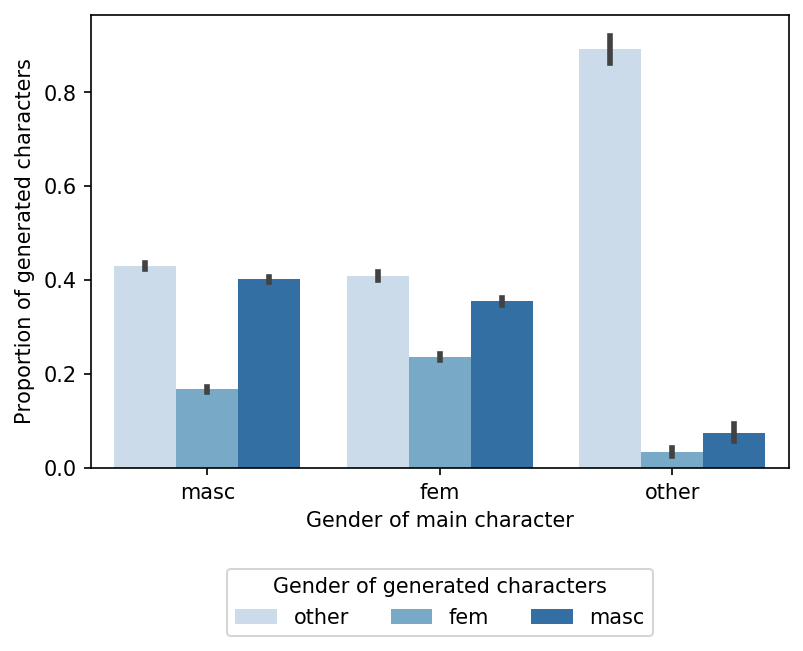

In [52]:
plt.figure(dpi=150)
sns.barplot(x="main_gender", y="frac", palette="Blues", hue="neighbor_gender", data=d)
plt.legend(title="Gender of generated characters", loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)
plt.xlabel("Gender of main character")
plt.ylabel("Proportion of generated characters")
plt.show()

## Topics

In [24]:
with open(LOGS + 'gender_topics_0.9.json', 'r') as infile: 
    gender_topics = json.load(infile)

AttributeError: module 'matplotlib.pyplot' has no attribute 'xticklabels'

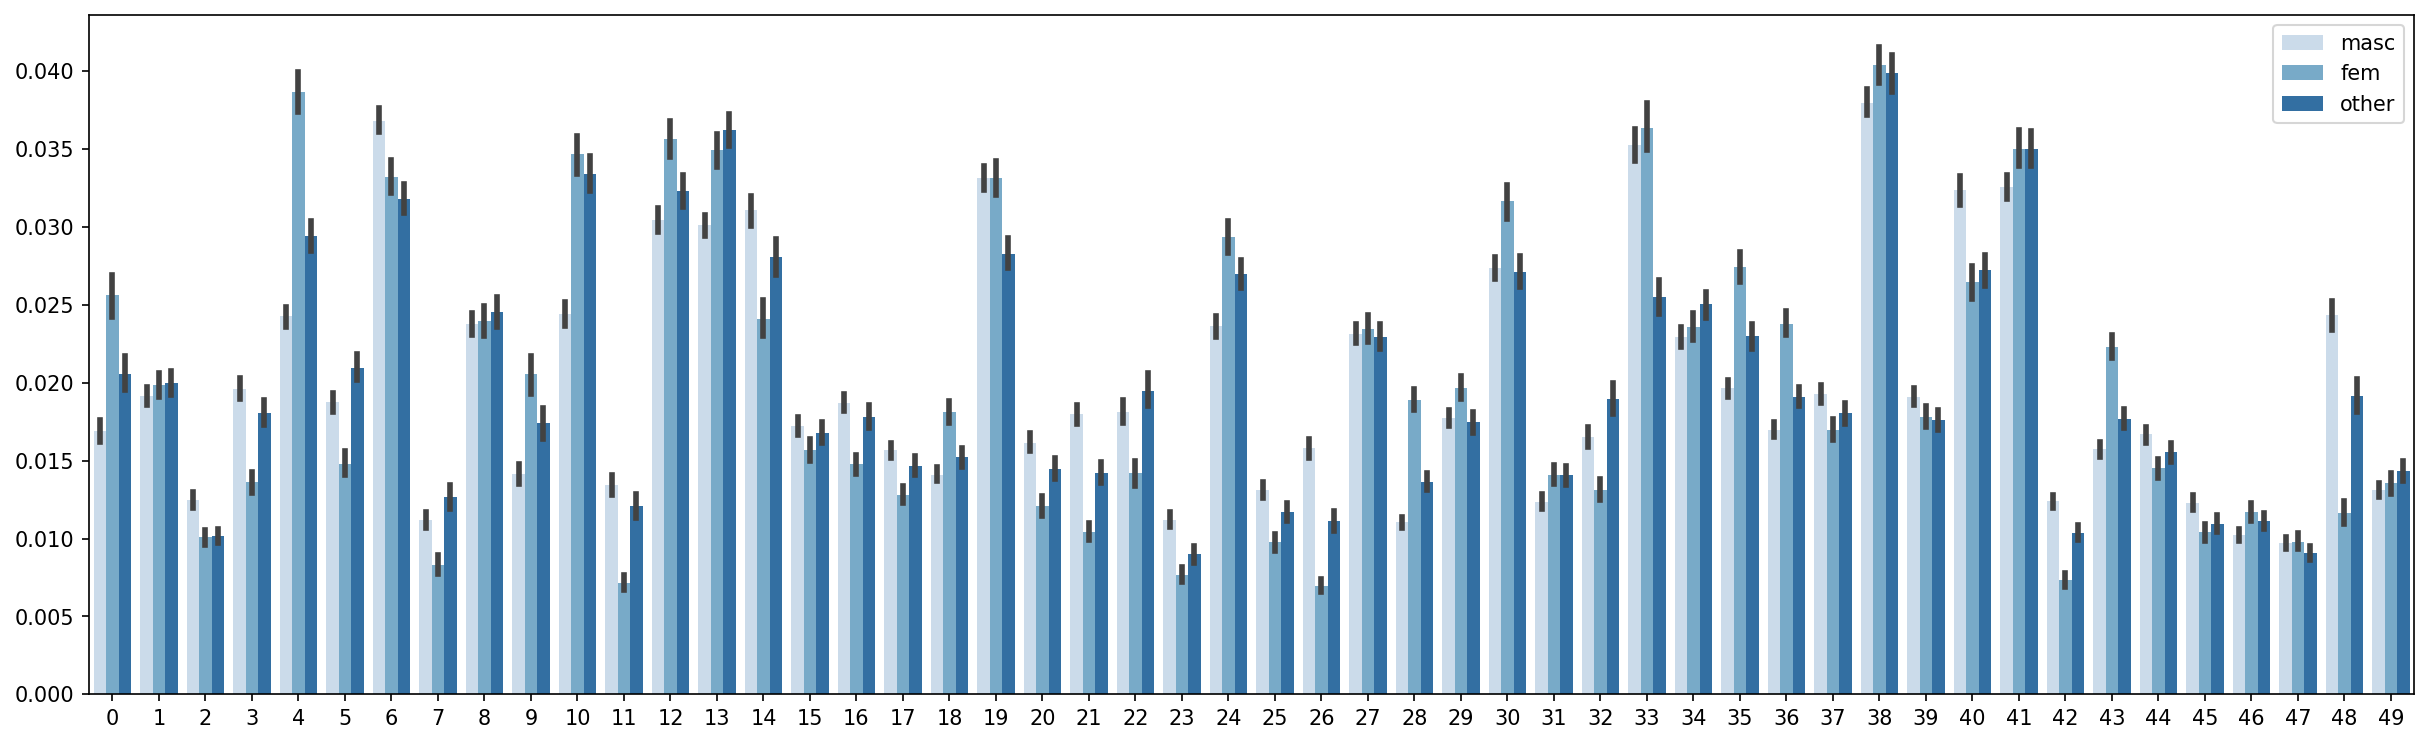

In [27]:
plt.figure(dpi=150, figsize=(20,6))
sns.barplot(x="topic", y="value", palette="Blues", hue="gender", data=gender_topics)
plt.xticklabels(rotation=30)

In [25]:
topics = gender_topics['topic']
masc = []
fem = []
for i, t in enumerate(topics): 
    if t == 29: 
        if gender_topics['gender'][i] == 'masc':
            masc.append(gender_topics['value'][i])
        elif gender_topics['gender'][i] == 'fem':
            fem.append(gender_topics['value'][i])
print(np.mean(masc), np.mean(fem))

0.01773094760514977 0.01964234363153048


In [21]:
gender_df = pd.DataFrame.from_dict(gender_topics)

In [23]:
topic_29 = gender_df[gender_df['topic'] == 29]
#topic_29['value']
topic_29

,gender,topic,value
29,masc,29,0.274048
79,masc,29,0.274048
129,masc,29,0.274048
179,masc,29,0.274048
229,masc,29,0.274048
...,...,...,...
2324779,masc,29,0.274048
2324829,masc,29,0.274048
2324879,masc,29,0.274048
2324929,masc,29,0.274048
